In [2]:
import numpy as np

from gscore.fdr import GlobalDistribution

In [3]:
model_path = "/home/aaron/projects/ghost/data/spike_in/models/peptide.test"

In [4]:
global_model = GlobalDistribution.load(model_path)

In [5]:
import pandas as pd

check = pd.DataFrame(
    {
        "label": global_model.labels.ravel(),
        "scores": global_model.scores.ravel()
    }
)

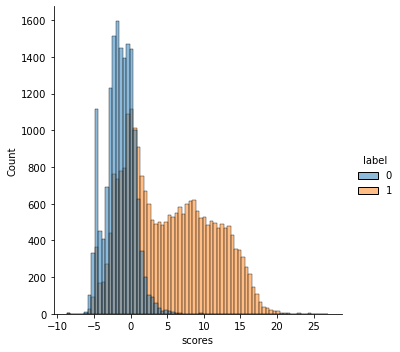

In [6]:
import seaborn as sns

sns.displot(check, x="scores", hue="label")

In [7]:
decoy_values = check[check["scores"] >= 0.50]["label"].value_counts()

In [8]:
decoy_values[0] / decoy_values[1]

0.11967185854442658

In [9]:
function_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.target_scores.ravel(),
        "type": ["Target" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

In [10]:
function_check

,label,scores,type
0,-8.710134,0.000188,Target
1,-8.674348,0.000194,Target
2,-8.638562,0.000194,Target
3,-8.602776,0.000188,Target
4,-8.566991,0.000177,Target
...,...,...,...
995,26.896641,0.000077,Target
996,26.932426,0.000087,Target
997,26.968212,0.000094,Target
998,27.003998,0.000098,Target


In [11]:
decoy_check = pd.DataFrame(
    {
        "label": global_model.score_distribution.x_axis.ravel(),
        "scores": global_model.score_distribution.decoy_scores.ravel(),
        "type": ["Decoy" for _ in range(global_model.score_distribution.x_axis.shape[0])]
    }

)

all_scores = pd.concat(
    [
        function_check,
        decoy_check
    ]
).reset_index()

<AxesSubplot:xlabel='label', ylabel='scores'>

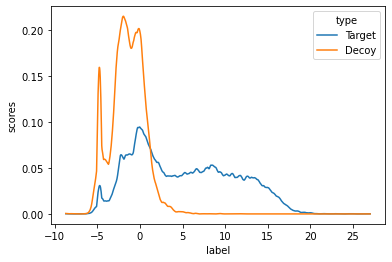

In [12]:
sns.lineplot(data=all_scores, x="label", y="scores", hue="type")

In [13]:
global_model.q_values[global_model.q_values <= 0.1]

array([0.00080815, 0.00093996, 0.00186042, ..., 0.09022127, 0.05478208,
       0.06428734])

In [179]:
global_model.q_values[global_model.q_values <= 0.01]

array([0.00070422, 0.        , 0.00162258, ..., 0.00949106, 0.00982631,
       0.00941716])